In [2079]:
import pandas as pd
import requests
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2080]:
# creating pandas data frame with the WeRateDogs Twitter archive.
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [2081]:
# Make directory for image_predictions
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [2082]:
# download programmatically "image_predictions.tsv" from Udacity's servers
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

In [2083]:
# write the downloded data to the computer
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [2084]:
# load the data into a data frame
image_pred = pd.read_csv('image_predictions/image-predictions.tsv', sep='\t')
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [2085]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [2086]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [2087]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [2088]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = archive.tweet_id.values
len(tweet_ids)

2356

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [2089]:
# read the 'tweet-json.txt' line by line into pandas data frame.
dict_list = []
with open('tweet-json.txt','r') as json_file:
    for line in json_file:
        data = json.loads(line)
        tweet_id = data.get('id_str')
        retweet_count = data.get('retweet_count')
        favorite_count = data.get('favorite_count')
        dict_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [2090]:
tweets = pd.DataFrame(dict_list)
tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Asseing the data

In [2091]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [2092]:
# checking for duplicated
image_pred.tweet_id.duplicated().value_counts()

False    2075
Name: tweet_id, dtype: int64

In [2093]:
# checking for missing values and columns data type.
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [2094]:
# looking at the values of dog breads.
image_pred.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [2095]:
# looking if there are rows where all three prediction are not a dog.
not_dog = image_pred.query('(p1_dog == False) and (p2_dog == False) and (p3_dog == False)')
len(not_dog)

324

### image_pred:
 #### quality:
   - wrong data type for tweet_id, needs to be string instead of int.
   - dog breads in p1, p2, p3 are not in one format, space sometimes appears as "-" and others with "_". Also there are names who start without capital letter.
   - Columns names: p1, p2, p3 are not informative.
   - There are 324 rows where the dog prediction is not a dog.
     

In [2096]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [2097]:
# checking for missing values and columns data type.
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [2098]:
# looking at name values.
archive.name.value_counts().loc[lambda x : x>5]

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Penny       10
Lola        10
Tucker      10
Bo           9
Winston      9
Sadie        8
the          8
Toby         7
Buddy        7
an           7
Bailey       7
Daisy        7
Rusty        6
Stanley      6
Jax          6
Dave         6
Jack         6
Milo         6
Oscar        6
Scout        6
Leo          6
Bella        6
Koda         6
Name: name, dtype: int64

In [2099]:
# checking for duplicated
archive.tweet_id.duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [2100]:
# looking at the source column, to see what information it gives
pd.options.display.max_colwidth
archive.source

0       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
3       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
4       <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
                                               ...                                        
2351    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2352    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2353    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2354    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
2355    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>

### Archive

#### Quality:
 - Many missing values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id. 
 - The table should only contain original tweets, therefore columns of retweet or replay should be removed. 
 - Some rows has a double same URL, creating very long lines.
 - Wrong columns types: tweet_id 'int' instead of 'str', timestamp 'object' instead of 'datetime'.
 - 745 missing dogs names and other names as 'a', 'an', 'the'.
 - Source columns information is wrriten in html code, long lines and hard to get relevent information from it.
 - Many values written as "None" in the dog staged columns.

#### Tidines:
 - "doggo", "floofer", "pupper" and "puppo" should be all in one column because there all represent the dog stages.
 - Merge the data frame with image_pred data frame.

In [2101]:
tweets

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [2102]:
# checking for duplicated
tweets.tweet_id.duplicated().value_counts()

False    2354
Name: tweet_id, dtype: int64

In [2103]:
# checking for missing values and columns data type.
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### tweets

#### Tidines:
 - Tweets table should be merged into the two other data frames.

# Data Assesing Summery

## Quality:

### image_pred:

   - Data type for tweet_id, should  be string instead of int.
   - Dog breads in p1, p2, p3 are not in one format, space sometimes appears as "-" and others with "_". Also there are names who start without capital letter.
   - Columns names: p1, p2, p3 are not informative.
   - There are 324 rows where the dog prediction is not a dog.
   
### Archive

 - Many missing values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id. 
 - The table should only contain original tweets, therefore columns of retweet or replay should be removed. 
 - Some rows has a double same URL, creating very long lines.
 - Wrong columns types: tweet_id 'int' should be 'str', timestamp 'object' should be 'datetime'.
 - 745 missing dogs names and other names as 'a', 'an', 'the'.
 - Source columns information is wrriten in html code, long lines and hard to get relevent information from it.

## Tidines: 

### Archive
 - "doggo", "floofer", "pupper" and "puppo" should be all in one column because there all represent the dog stages.

### All:
 - All tables should be merged into one date frame.

# Data cleaning

In [2104]:
# making copy of the tables before the cleaning process.
archive_clean = archive.copy()
image_clean = image_pred.copy()
tweets_clean = tweets.copy()

## Quality:
### Image_pred:
 - Data type for tweet_id, should be string instead of 'int'.

#### Define: 
 - Change type for tweet_id from int to string by using the method astype().

#### Code:

In [2105]:
image_clean.tweet_id = image_clean.tweet_id.astype(str)

#### Test:

In [2106]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


 - Dog breads in p1, p2, p3 are not in one format, space sometimes appears as "-" and others with "_". Also there are names who start without capital letter.

#### Define:
 - Create one format for the dog breads name in columns p1, p2, p3. Change all the names to start eith capital letter with the .title() method. replace all '-', with '_ with the replace method. 

#### Code:

In [2107]:
def clean_string(df_series):
    return df_series.str.replace('-','_').str.lower()

In [2108]:
image_clean.p1 = clean_string(image_clean.p1)
image_clean.p2 = clean_string(image_clean.p2)
image_clean.p3 = clean_string(image_clean.p3)

#### Test:

In [2109]:
image_clean.p1.unique()

array(['welsh_springer_spaniel', 'redbone', 'german_shepherd',
       'rhodesian_ridgeback', 'miniature_pinscher',
       'bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'gordon_setter',
       'walker_hound', 'pug', 'bloodhound', 'lhasa', 'english_setter',
       'hen', 'desktop_computer', 'italian_greyhound', 'maltese_dog',
       'three_toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft_coated_wheaten_terrier', 'chihuahua',
       'black_and_tan_coonhound', 'coho', 'toy_terrier',
       'blenheim_spaniel', 'pembroke', 'llama',
       'chesapeake_bay_retriever', 'curly_coated_retriever', 'dalmatian',
       'ibizan_hound', 'border_collie', 'labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'west_highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'rottweiler',
       'siberian_husky', 't

 - Columns names: p1, p2, p3 are not informative.

#### Define:
- Change column names as follow: 
    p1 to prediction1
    p2 to prediction2
    p3 to prediction3, using the rename method.

#### Code:

In [2110]:
image_clean = image_clean.rename(columns={'p1':'prediction1','p2':'prediction2','p3':'prediction3'})

#### Test:

In [2111]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tweet_id     2075 non-null   object 
 1   jpg_url      2075 non-null   object 
 2   img_num      2075 non-null   int64  
 3   prediction1  2075 non-null   object 
 4   p1_conf      2075 non-null   float64
 5   p1_dog       2075 non-null   bool   
 6   prediction2  2075 non-null   object 
 7   p2_conf      2075 non-null   float64
 8   p2_dog       2075 non-null   bool   
 9   prediction3  2075 non-null   object 
 10  p3_conf      2075 non-null   float64
 11  p3_dog       2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


   - There are 324 rows where the dog prediction is not a dog.

#### Define:
 - Remove all rows that the prediction is not a dog by keeping only the rows with at least one dog breed prediction.

#### Code:


In [2112]:
image_clean = image_clean.query('(p1_dog != False) or (p2_dog != False) or (p3_dog != False)')

#### Test:

In [2113]:
not_dog = image_clean.query('(p1_dog == False) and (p2_dog == False) and (p3_dog == False)')
len(not_dog)

0

### Archive

 - Many missing values in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id. 
 - The table should only contain original tweets, therefore columns of retweet or replay should be removed. 

#### Define:
 - Remove the following columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id.

#### Code:

In [2114]:
archive_clean = archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

#### Test:

In [2115]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   expanded_urls       2297 non-null   object
 5   rating_numerator    2356 non-null   int64 
 6   rating_denominator  2356 non-null   int64 
 7   name                2356 non-null   object
 8   doggo               2356 non-null   object
 9   floofer             2356 non-null   object
 10  pupper              2356 non-null   object
 11  puppo               2356 non-null   object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


- Some rows has a double same URL, creating very long lines.

#### Define: 
 - Remove the extra URL from the relevent rows using split and take the first argument.

#### Code:

In [2116]:
# filter the null values.
filterd_url = archive_clean[archive_clean['expanded_urls'].notnull()]

In [2117]:
# create a function to clean the URL column.
def clean_url(url):
    return url.split(',')[0]

archive_clean.expanded_urls = filterd_url.expanded_urls.apply(clean_url)

#### Test:

In [2118]:
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


 - Wrong columns types: tweet_id 'int' should be 'str', timestamp 'object' should be 'datetime'.



#### Define:
 - Change column types with astype( ), tweet_id to a string and timestamp to datetime with pd.to_datetime.

#### Code:

In [2119]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

#### Test:

In [2120]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   object             
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   int64              
 6   rating_denominator  2356 non-null   int64              
 7   name                2356 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

 - 745 missing dogs names and other names as 'a', 'an', 'the' etc.

#### Define:
 - Replace the invalid names such as 'a', 'an', 'the' etc into valid dog names and fill the missing dog names by extracting the dog names from the tex column.

#### Code:

In [2121]:
archive_clean.name[archive_clean.name.str.islower()].value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
not              2
getting          2
actually         2
mad              2
life             1
by               1
unacceptable     1
this             1
infuriating      1
incredibly       1
old              1
all              1
my               1
light            1
officially       1
space            1
such             1
his              1
Name: name, dtype: int64

In [2122]:
# create a list with the invalid names by seprating all dog names that are not wrriten with capitl letter and 'None'.
invalid_names = archive_clean.name[archive_clean.name.str.islower()].values.tolist()
invalid_names = list(set(invalid_names))
invalid_names.append('None')
invalid_names

['an',
 'life',
 'officially',
 'my',
 'getting',
 'light',
 'just',
 'all',
 'this',
 'old',
 'mad',
 'very',
 'such',
 'one',
 'space',
 'unacceptable',
 'actually',
 'his',
 'the',
 'a',
 'incredibly',
 'by',
 'infuriating',
 'quite',
 'not',
 'None']

In [2123]:
# creating a data frame that will extract the names the comes after "named", "name is" or "this is" from the text.
named = archive_clean.text.str.extract(r'((?<=named)\s\w+)').dropna()
name_is = archive_clean.text.str.extract(r'((?<=name is)\s\w+)').dropna()
this_is = archive_clean.text.str.extract(r'((?<=this is)\s\w+)').dropna()
missing_names = pd.concat([named,name_is,this_is])

In [2124]:
# replace the invalid names with real names in the columns we found.
archive_clean.loc[missing_names.index, 'name'] = missing_names[0]

In [2125]:
# replace the rest of the invalid names with NaN
archive_clean.name = archive_clean.name.replace(invalid_names, np.nan)

#### Test:

In [2126]:
archive_clean.name.value_counts()

Charlie     12
Cooper      11
Oliver      11
Lucy        11
Penny       10
            ..
Stefan       1
Corey        1
Storkson     1
Gustav       1
Kanu         1
Name: name, Length: 971, dtype: int64

In [2127]:
archive_clean.name[archive_clean.name.str.islower() == True]

498      actually
801       getting
841             a
887             a
893           all
1051         what
1111          dog
1356            a
1401            a
1618            a
1669      getting
1841            a
1890     fabulous
1906            a
2131          dog
Name: name, dtype: object

In [2128]:
# fix the remaning invalid values
fix = archive_clean.name[archive_clean.name.str.islower() == True]
archive_clean.loc[fix.index, 'name'] = np.nan
# test again
archive_clean.name[archive_clean.name.str.islower() == True]

Series([], Name: name, dtype: object)

In [2129]:
archive_clean.name.value_counts()

Charlie     12
Cooper      11
Lucy        11
Oliver      11
Penny       10
            ..
Stefan       1
Corey        1
Storkson     1
Gustav       1
Kanu         1
Name: name, Length: 964, dtype: int64

 - Source columns information is wrriten in html code, long lines and hard to get relevent information from it.

#### Define:
 - Extract the source from the source column html code by using the method .strip().

#### Code:

In [2130]:
archive_clean.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [2131]:
# create a loop to extract the source from the the source text.
new_list = []
for source in archive_clean.source:
    new_list.append(source.split('>', 1)[-1][:-4])
archive_clean.source = new_list   

#### Test:

In [2132]:
archive_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

## Tidines:
 - "doggo", "floofer", "pupper" and "puppo" should be all in one column because there all represent the dog stages.

#### Define: 
 - Create a new column "dog stage" that will contain the dog stage instead of the four columns: "doggo", "floofer", "pupper" and "puppo" by using the melt function.

#### Code:

In [2133]:
# convert all the 'None' into NaN.
def col_nan(col):
    archive_clean[col] = archive_clean[col].replace('None', ' ')
        
dog_stage_columns = ['doggo', 'floofer','pupper', 'puppo'] 
for col in dog_stage_columns:
    archive_clean.col = col_nan(col)

In [2134]:
# filter the data and divide to two data frames, one with dog stage value and the other without.
filtered = archive_clean.query('doggo == "doggo" | floofer == "floofer" | pupper == "pupper" | puppo == "puppo"')
no_stage = archive_clean.query('doggo == " " & floofer == " " & pupper == " " & puppo == " "')

In [2135]:
# create the dog_stage column in the data frame with dog stage data.
filtered = pd.melt(filtered, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator','name'], var_name='dog_stage')
filtered = filtered[filtered['value'] != ' ']
filtered = filtered.drop('value', axis=1)

In [2136]:
# drop the NaN dog stages columns.
no_stage.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [2137]:
# concatenate back the two clean data frames.
archive_clean = pd.concat([filtered, no_stage], join="outer",ignore_index=True)

#### Test:

In [2138]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,14,10,Cassie,doggo
1,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog meetings today he just enjoys looking his best at all times. 12/10 for dangerously dapper doggo https://t.co/YSI00BzTBZ,https://twitter.com/dog_rates/status/884162670584377345/photo/1,12,10,Yogi,doggo
2,872967104147763200,2017-06-09 00:02:31+00:00,Twitter for iPhone,Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR,https://twitter.com/dog_rates/status/872967104147763200/photo/1,12,10,NaN,doggo
3,871515927908634625,2017-06-04 23:56:03+00:00,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaraguan Zoom Zoom. Runs on one leg. Built for deception. No eyes. Good with kids. 12/10 great doggo https://t.co/PR7B7w1rUw,https://twitter.com/dog_rates/status/871515927908634625/photo/1,12,10,Napolean,doggo
4,871102520638267392,2017-06-03 20:33:19+00:00,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758080503809,14,10,NaN,doggo


- All tables should be merged into one date frame.

#### Define:
 - Merge all 3 data frames to one main data frame using the merge function on "tweet_id" column.

#### Code:

In [2139]:
# merge all three tables to one data frame.
archive_clean = pd.merge(archive_clean, tweets_clean, on='tweet_id', how='left')
df_tweets = pd.merge(image_clean, archive_clean, on='tweet_id', how='left')

#### Test:

In [2140]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1763 entries, 0 to 1762
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1763 non-null   object             
 1   jpg_url             1763 non-null   object             
 2   img_num             1763 non-null   int64              
 3   prediction1         1763 non-null   object             
 4   p1_conf             1763 non-null   float64            
 5   p1_dog              1763 non-null   bool               
 6   prediction2         1763 non-null   object             
 7   p2_conf             1763 non-null   float64            
 8   p2_dog              1763 non-null   bool               
 9   prediction3         1763 non-null   object             
 10  p3_conf             1763 non-null   float64            
 11  p3_dog              1763 non-null   bool               
 12  timestamp           1763 non-null 

## Storing the data

In [2141]:
# store the final data frame df_tweets in a csv file
df_tweets.to_csv('twitter_archive_master.csv',index=False)

## Analyzing the data

In [2142]:
# import the data from the csv file and make a copy to work on
twitter_master = pd.read_csv('twitter_archive_master.csv')
df = twitter_master.copy()

### Q1: Which dog breed has the highest prediction confidance?

In [2143]:
# creating 3 data frames from each prediction
df_p1[['prediction','conf','dog']] = df[['prediction1', 'p1_conf','p1_dog']]
df_p2[['prediction','conf','dog']] = df[['prediction2', 'p2_conf','p2_dog']]
df_p3[['prediction','conf','dog']] = df[['prediction3', 'p3_conf','p3_dog']]

In [2144]:
# unite all data frames to one data frame with predicted dog breed 
df_conf = pd.concat([df_p1,df_p2,df_p3])
df_conf = df_conf.query('dog == True')
df_conf

,prediction,conf,dog
0,welsh_springer_spaniel,0.465074,True
1,redbone,0.506826,True
2,german_shepherd,0.596461,True
3,rhodesian_ridgeback,0.408143,True
4,miniature_pinscher,0.560311,True
...,...,...,...
1755,chesapeake_bay_retriever,0.118184,True
1756,pembroke,0.076507,True
1759,german_short_haired_pointer,0.175219,True
1761,kelpie,0.031379,True


In [2145]:
# group the data frame by dog breed, choose the top 10 dog breeds
df_grouped = df_conf.groupby('prediction')['conf'].mean().sort_values(ascending=False)[:10]
df_grouped

prediction
bernese_mountain_dog     0.651259
komondor                 0.522381
samoyed                  0.503612
pembroke                 0.489368
pug                      0.474861
blenheim_spaniel         0.468254
golden_retriever         0.449035
dalmatian                0.434189
german_shepherd          0.362775
flat_coated_retriever    0.352618
Name: conf, dtype: float64

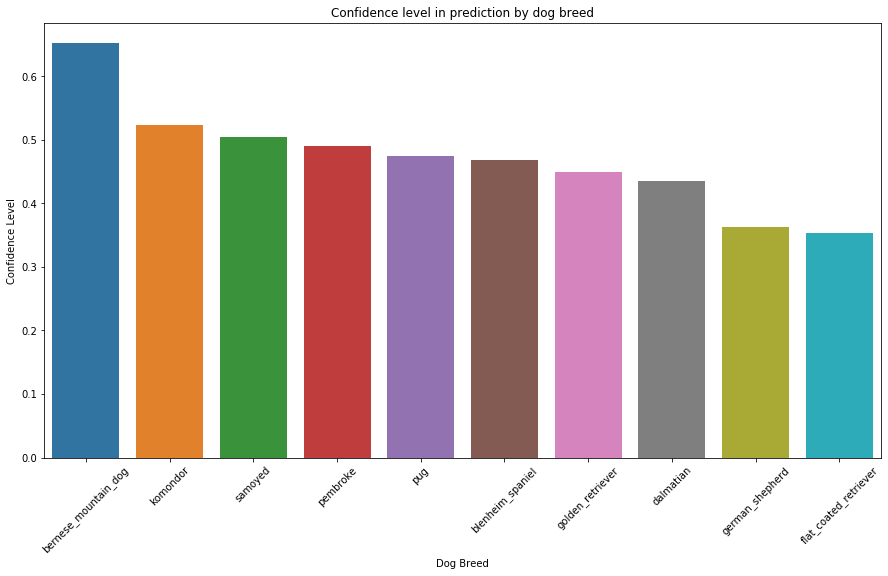

In [2146]:
plt.figure(figsize=(15,8))
sns.barplot(df_grouped.index, df_grouped.values)
plt.title('Confidence level in prediction by dog breed')
plt.xlabel('Dog Breed')
plt.xticks(rotation=45)
plt.ylabel('Confidence Level');


 - The dog breed with the highest confidence level of prediction is the Bernese Mountain Dog, the meaning is that this breed is when a prediction is made that this breed is the one that was recognized, there is the highest chance on avaerage (more then 60%) that it is the correct one. 


### Q2: From what source the largest amount of tweets is coming from?

In [2147]:
# create data frame with with the tweets source and the count
df_source = df.source.value_counts()

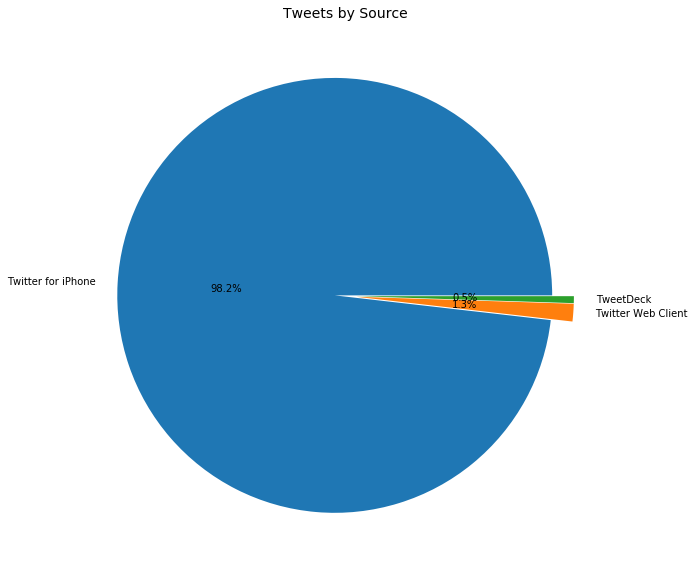

In [2148]:
pie, ax = plt.subplots(figsize=[14,10])
labels = df_source.keys()
plt.pie(x=df_source, autopct="%.1f%%", explode=[0.05]*3, labels=labels, pctdistance=0.5)
plt.title("Tweets by Source", fontsize=14);


 - The channel that was used the most to tweet out of the channels the data was collected from is 'Twitter for iPhone'. 98.2% from the tweets were made from Twitter for iPhone.

### Q3: Does number of likes increase or decrease over time?

In [2149]:
import datetime as dt
df_likes = df.copy()

In [2150]:
# create a column with the month and year
df_likes['month_year'] = pd.to_datetime(df['timestamp']).dt.to_period('M')
df_likes.month_year = df_likes.month_year.astype(str)

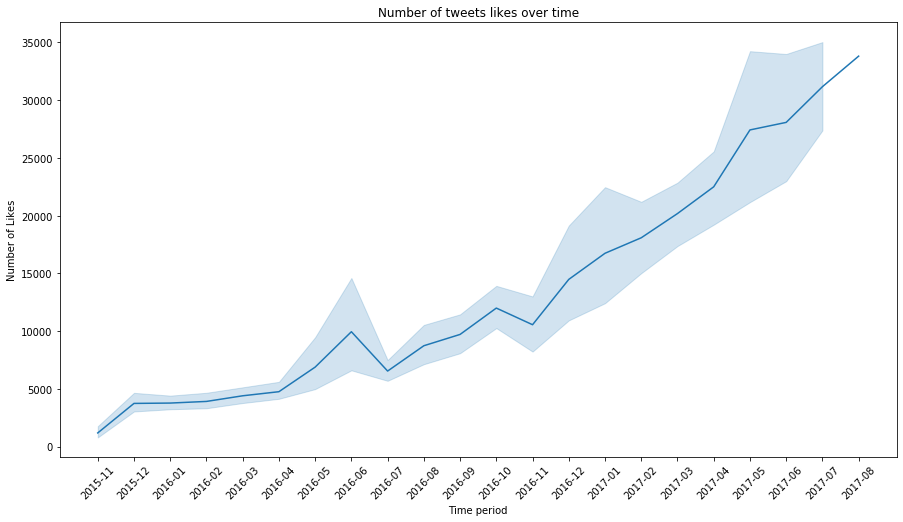

In [2151]:
plt.figure(figsize=(15,8))
sns.lineplot(x='month_year', y='favorite_count', data=df_likes)
plt.title("Number of tweets likes over time")
plt.xlabel('Time period')
plt.xticks(rotation=45)
plt.ylabel('Number of Likes');


 - From the vizualisation we can see that over time the number of likes increases. from around 1000 likes in 11/2015 to around 34,000 likes on 08/2017. 

## Insights Summery:
 - The Bernese Mountain Dog breed is predicted with the highest confidence level from all the other breeds, more than 60% confidence level.
 - The channel that was used the most to publish tweets from is the 'Twitter for iPhone'. 
 - Over time (2015-2017) the popularity of the WeRateDog increases, , judging by the number of likes,.